In [1]:

!pip install numpy
import numpy as np

X_train=np.load('h_cough/X_train.npy')
Xtest=np.load('h_cough/X_test.npy')

X_train = np.stack(X_train)
Xtest = np.stack(Xtest)

In [2]:

import csv

with open('h_cough/y_train.csv', newline='') as f:
    reader = csv.reader(f)
    Y_train = list(reader)

print(Y_train)
Y_train.pop(0)
print(Y_train)

with open('h_cough/y_test.csv', newline='') as f:
    reader = csv.reader(f)
    Y_test = list(reader)

print(len(Y_test))
Y_test.pop(0)

!pip install sklearn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train).reshape([len(Y_train), 1])

encoder = LabelEncoder()
encoder.fit(Y_test)

Y_test = encoder.transform(Y_test).reshape([len(Y_test), 1])

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2],1)



print(X_train.shape)
print(Xtest.shape)
print(Y_train.shape)
print(Y_test.shape)

[['label'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negati

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
#importing the keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GRU,BatchNormalization
from keras import regularizers
from keras.constraints import unit_norm
import tensorflow as tf

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3),strides=(2,2), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(l=0.01), padding='same', input_shape=(X_train.shape[1:])))
Dropout(0.25),
model.add(Conv2D(64, kernel_size=(3, 3),strides=(2,2), activation='relu',kernel_regularizer=regularizers.l2(l=0.01),padding='same')),
model.add(MaxPooling2D((2, 2)))
BatchNormalization()
Dropout(0.2),

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


'''
Optimizer = Adam
Loss = binary_crossentropy
'''
optimiser = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
model.summary()

history = model.fit(X_train, Y_train, validation_data=(Xtest, Y_test),batch_size=32,epochs=11)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 86, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 43, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 21, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 21504)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2752640   
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                      

In [12]:
print("saving model")
model.save('models/h_cough_model')

saving model
INFO:tensorflow:Assets written to: models/h_cough_model\assets


In [13]:
h_cough_model = tf.keras.models.load_model('models/h_cough_model')

print(h_cough_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 86, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 43, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 21, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 21504)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2752640   
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                      

In [14]:
print("model acuuracy of testing data:")
test=h_cough_model.evaluate(Xtest,Y_test)
print(f"Test accuracy:{test[1]*100}")
print(f"Test loss:{test[0]}")

pred1=h_cough_model.predict(Xtest)
print(pred1)
print(len(pred1))


model acuuracy of testing data:
15/15 [==============================] - 0s 19ms/step - loss: 2.3573 - accuracy: 0.7137
Test accuracy:71.36752009391785
Test loss:2.3572702407836914
[[1.19402200e-01]
 [3.71403098e-02]
 [7.69205235e-06]
 [3.48462672e-05]
 [4.52584800e-07]
 [1.16876572e-01]
 [7.70312548e-03]
 [2.55687118e-01]
 [7.44295120e-03]
 [8.86401236e-02]
 [7.63908029e-03]
 [2.55687237e-01]
 [3.03510755e-01]
 [5.76490462e-02]
 [9.30938840e-01]
 [1.70632422e-01]
 [6.21348619e-03]
 [1.17433667e-02]
 [2.02665560e-05]
 [1.24543905e-04]
 [4.27909017e-01]
 [1.01049291e-09]
 [4.27833200e-03]
 [8.47284173e-05]
 [3.73125970e-01]
 [8.37734115e-05]
 [5.51782966e-01]
 [4.93496656e-04]
 [2.55687237e-01]
 [3.01957875e-01]
 [8.14356506e-02]
 [1.40309334e-04]
 [8.42525661e-02]
 [6.28430353e-05]
 [9.72937644e-01]
 [9.52171743e-01]
 [1.28775835e-04]
 [1.56751633e-01]
 [2.76797459e-06]
 [2.13389129e-07]
 [2.69830227e-04]
 [5.07415593e-01]
 [1.25679374e-03]
 [9.32820022e-01]
 [6.31722808e-03]
 [1.15883

In [15]:
from sklearn.model_selection import train_test_split
import sklearn
predict_x=h_cough_model.predict(Xtest)
print((predict_x).ravel())


[1.19402200e-01 3.71403098e-02 7.69205235e-06 3.48462672e-05
 4.52584800e-07 1.16876572e-01 7.70312548e-03 2.55687118e-01
 7.44295120e-03 8.86401236e-02 7.63908029e-03 2.55687237e-01
 3.03510755e-01 5.76490462e-02 9.30938840e-01 1.70632422e-01
 6.21348619e-03 1.17433667e-02 2.02665560e-05 1.24543905e-04
 4.27909017e-01 1.01049291e-09 4.27833200e-03 8.47284173e-05
 3.73125970e-01 8.37734115e-05 5.51782966e-01 4.93496656e-04
 2.55687237e-01 3.01957875e-01 8.14356506e-02 1.40309334e-04
 8.42525661e-02 6.28430353e-05 9.72937644e-01 9.52171743e-01
 1.28775835e-04 1.56751633e-01 2.76797459e-06 2.13389129e-07
 2.69830227e-04 5.07415593e-01 1.25679374e-03 9.32820022e-01
 6.31722808e-03 1.15883523e-07 9.31113958e-04 3.60614455e-10
 7.43285537e-01 1.87406641e-08 1.02296472e-03 1.41109294e-05
 2.02063205e-07 9.92780685e-01 8.29285264e-01 4.51858938e-02
 6.32933915e-01 1.69457197e-02 3.89425159e-02 9.60558653e-04
 2.86203623e-03 3.53978276e-01 1.99228525e-04 1.20963188e-04
 2.28891373e-01 7.447526

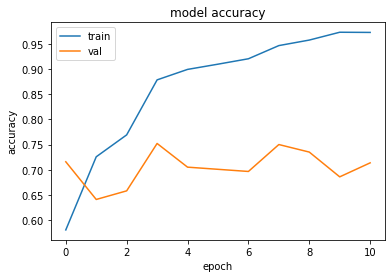

In [16]:
!pip install matplotlib
from matplotlib import pylab

pylab.plot(history.history['accuracy'])
pylab.plot(history.history['val_accuracy'])
pylab.title('model accuracy')
pylab.ylabel('accuracy')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()

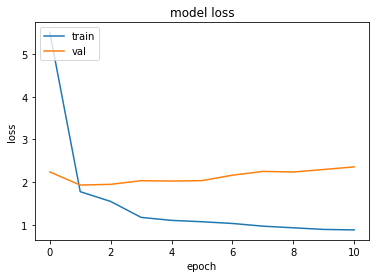

In [23]:

pylab.plot(history.history['loss'])
pylab.plot(history.history['val_loss'])
pylab.title('model loss')
pylab.ylabel('loss')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()

In [35]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# extract the predicted probabilities
p_pred = model.predict(Xtest)
p_pred = p_pred.flatten()
# print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
# print(y_pred)
# [1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 ...

cf_matrix=confusion_matrix(Y_test, y_pred)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Y_test,y_pred)
print('Classification report : \n',matrix)



Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       357
           1       0.34      0.23      0.27       111

    accuracy                           0.71       468
   macro avg       0.56      0.55      0.55       468
weighted avg       0.68      0.71      0.69       468



In [36]:
print(type(cf_matrix))

<class 'numpy.ndarray'>


<AxesSubplot:>

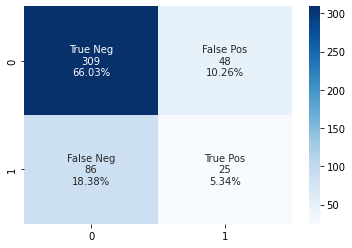

In [39]:
!pip install seaborn
import seaborn as sns


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')